In [1]:
!pip install opencv-python-headless


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


Saving sd.jpg to sd.jpg


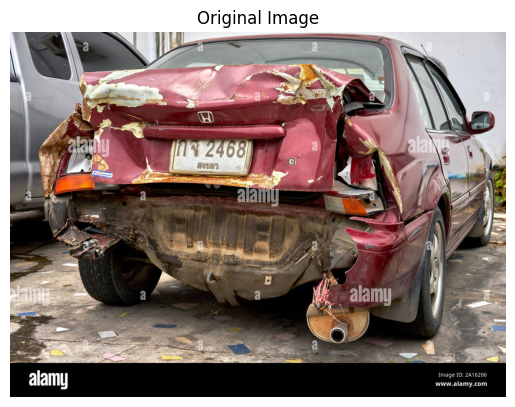

In [3]:
uploaded = files.upload()

# Load the image
for filename in uploaded.keys():
    img_path = filename

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [4]:
def preprocess_car_image(img):
    # Resize
    resized = cv2.resize(img, (512, 512))

    # Convert to Grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)

    # Denoise
    denoised = cv2.GaussianBlur(gray, (5, 5), 0)

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(denoised)

    # Edge Detection
    edges = cv2.Canny(enhanced, 50, 150)

    return resized, gray, denoised, enhanced, edges


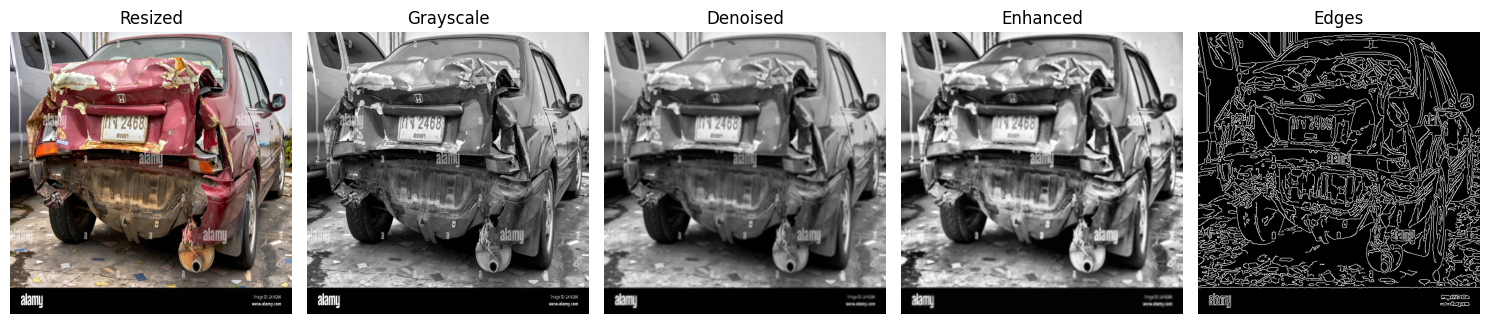

In [5]:
resized, gray, denoised, enhanced, edges = preprocess_car_image(image)

# Plot results
titles = ['Resized', 'Grayscale', 'Denoised', 'Enhanced', 'Edges']
images = [resized, gray, denoised, enhanced, edges]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
